In [137]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [138]:
import os
import re
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import glob
import math
import numpy as np
import pandas as pd
from bisect import *
from decimal import Decimal

In [139]:
# Fixing bin edges
HIST_BINS = np.linspace(0, 32, 32)

#files
totf = '/Users/innocent/MallocProfiler/demos/memtotHist.csv'
livef = '/Users/innocent/MallocProfiler/demos/memliveHist.csv'

tot = np.genfromtxt(totf, delimiter=",",filling_values=0)
live = np.genfromtxt(livef, delimiter=",",filling_values=0)
print(tot.max())
print(tot.shape[0])
print(tot[0])


188406486.0
20
[0.00000e+00 2.16600e+03 1.00000e+00 2.00000e+01 2.03000e+02 6.78130e+04
 6.13750e+04 3.10380e+04 1.80270e+04 3.03030e+04 1.58077e+05 3.67250e+04
 1.11290e+04 8.50000e+03 8.24100e+03 3.17000e+02 1.39000e+03 4.88000e+02
 9.62000e+02 3.00000e+01 6.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]


In [140]:
def prepare_animation(bar_container,hist):

    def animate(frame_number):
        # read data in
        #print(frame_number)
        data = hist[frame_number][:32]
        for count, rect in zip(data, bar_container.patches):
            rect.set_height(count)
        return bar_container.patches
    return animate

In [141]:
def plot(hist,file,col) :
  # Output generated via `matplotlib.animation.Animation.to_jshtml`.

  # dummy just to start out
  data = np.array([0,0])
  fig, ax = plt.subplots()
  _, _, bar_container = ax.hist(data, HIST_BINS, lw=1,
                              ec="yellow", fc=col, alpha=0.5)
  ax.set_ylim(top=1.1*hist.max())  # set safe limit to ensure that all data is visible.

  ani = animation.FuncAnimation(fig, prepare_animation(bar_container,hist), tot.shape[0],
                              repeat=False, blit=True)
  ani.save(filename=file, writer="html")
  plt.show()

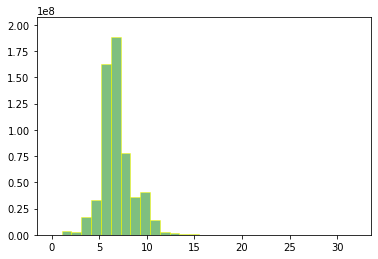

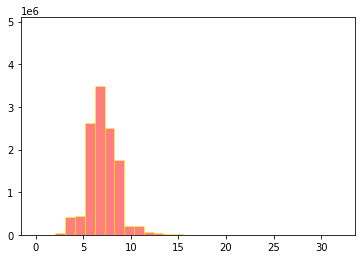

In [142]:
plot(tot,'/tmp/memtot.html',"green")
plot(live,'/tmp/memlive.html',"red")